# Estatística - Pg 65



In [5]:
import matplotlib.pyplot as plt
from collections import Counter
from typing import List
import sys
sys.path.append(f'/home/alizon/projetos/Data_Science_do_0/Script .py')
import Algebra_linear
import math

In [6]:
# Cada posição corresponde a quantidade de amigos de um usuario
num_amg = [45, 51, 62, 38, 51, 78, 51, 74, 78, 45,
          62, 45, 100, 20, 45, 74, 38, 62, 38, 51,
          20, 74, 20, 38, 32, 47, 32, 20, 47, 51]
count_amg = Counter(num_amg) # Dicionário com a contagem de cada valor
count_amg


Counter({45: 4,
         51: 5,
         62: 3,
         38: 4,
         78: 2,
         74: 3,
         100: 1,
         20: 4,
         32: 2,
         47: 2})

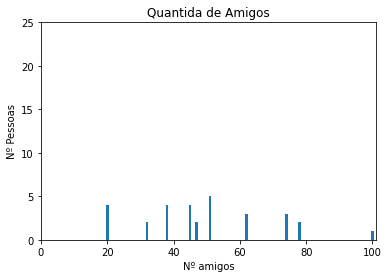

In [7]:
xs = range(max(num_amg, key=int) + 1) # range até o ultimo valor  
ys = [count_amg[x] for x in xs] # Percorrer todos os itens
plt.bar(xs, ys) # dados
plt.axis([0, 101, 0, 25 ]) # valorex eixo x e y
plt.title('Quantida de Amigos')
plt.xlabel('Nº amigos')
plt.ylabel('Nº Pessoas')
plt.show() # Exibir

In [8]:
num_itens = len(num_amg) # Tamanho da lista
maior_valor = max(num_amg) # Valor máximo
menor_valor = min(num_amg) # Valor Minímo
print(num_itens, maior_valor, menor_valor)

30 100 20


In [9]:
sorted_amg= sorted(num_amg) #Coloca em Ordem crescente
sorted_amg

[20,
 20,
 20,
 20,
 32,
 32,
 38,
 38,
 38,
 38,
 45,
 45,
 45,
 45,
 47,
 47,
 51,
 51,
 51,
 51,
 51,
 62,
 62,
 62,
 74,
 74,
 74,
 78,
 78,
 100]

## Tendências Centrais - pg 67

- media
- mediana
- quartil
- Moda

### Media
Sensível a outliers(valores anomálos) já que mudanças nos 
dados Influência no resultado da Média

### Mediana
se o numero de elementos for Ímpar ela obtém o valor do meio da matriz 
(matriz deve estar em ordem crescente). Se for par ela obtém a média
dos dois números do meio.

Outliers não influenciam nesses casos.

### Quartil
Forma de dividir os conjuntos de dados.<br />

quartil 1/4 - valor referente a 25% da amostra ordenada <br />
quartil 2/4 - (mediana) valor referente a 50% da amostra ordenada <br />
quartil 3/4 - valor referente a 75% da amostra ordenada

### Moda

Retorna uma lista com os valores que mais aparecem na matriz.

In [10]:
def media(xs : List[float]) -> float: #Media dos vetores
    return sum(xs)/len(xs)

media(num_amg)

49.63333333333333

In [11]:
#mediana com matriz com numero de elemntos impar
def _mediana_impar(xs: List[float]) -> float: 
    return xs[len(xs) // 2]

#mediana com matriz com numero de elemntos par
def _mediana_par(xs: List[float]) -> float:
    xs_sorted = sorted(xs)
    pont_med = len(xs_sorted) // 2
    
    return (xs[pont_med - 1] + xs[pont_med]) / 2
#Calcular Mediana
def mediana(v: List[float]) -> float:
    return _mediana_par(v) if len(v) % 2 == 0 else _mediana_impar(v)

In [12]:
matriz = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mediana(matriz)

5

In [13]:
matriz = [1, 2, 3, 4, 5, 6, 7, 8]
mediana(matriz)

4.5

In [14]:
mediana(sorted_amg)

47.0

In [15]:
# recebe a porcentagem de quartil e a matriz
#retornar o quartil corresponde a porcentagem informada
def quartil(xs: List[float], p:float) -> float:
    index = int(p * len(xs))
    return sorted(xs)[index]

print(quartil(matriz, 0.10), quartil(matriz, 0.25), 
      quartil(matriz, 0.50),
      quartil(matriz, 0.75), quartil(matriz, 0.90))


1 3 5 7 8


In [16]:
def moda(xs: List[float]) -> List[float]:
    counts = Counter(xs)
    max_value = max(counts.values())
    return [x_i for x_i, count in counts.items() 
            if count==max_value]

moda(num_amg)


[51]

## Dispersão - pg 69

- amplitude
- variância
- desvio padrao
- interquartil range

### Amplitude
Diferença entre o maior e o menor elemento.

### Variância
quase um desvio quadrado medio da média, mas ao invés de dividir por n, 
dividimos por n-1, isso é conhecido como correção de Bessel , que corrige
o viés na estimativa da variância da população , e alguns, mas não todos
os vieses na estimativa do padrão populacional desvio.

https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
    
### Desvio padrão
Representa o desvio padrão dos dados, ou seja quanto maior o valor do
desvio padrão mais os dados estão espalhados por uma ampla gama de 
valores, quanto mais baixo, mais perto os dados estão da média.

raiz quadrada da variância.

### Interquartil range
Como o desvio padrão e a amplitude são muito influenciados por outliers 
(valores anomálos que nao representam os dados), esse método vem com o 
alternativa para evitar poucos outliers.

ele representa a diferença entre 75% dos dados e 25% dos dados
(quartil 75% - quartil 25%)



In [17]:
def amplitude(xs:List[float]) -> float:
    return max(xs) - min(xs)

amplitude(num_amg)

80

In [18]:
def de_media(xs:List[float]) -> List[float]:
    _media = media(xs)
    return [x - _media for x in xs]

def variance (xs: List[float]) -> float: # Quase desvio quadrado da média
    assert len(xs) >= 2 # Variance requer 2 elementos no minimo
    n = len(xs)
    deviations = de_media(xs)
    
    return Algebra_linear.soma_quadrados(deviations) / (n - 1)
    
print(variance(num_amg))

385.20574712643685


In [19]:
def desvio_padrao(xs : List[float]) -> float:
    return math.sqrt(variance(xs))

desvio_padrao(num_amg)

19.626659092327376

In [20]:
def interquartitle_range(xs: List[float]) -> float:
    return quartil(xs, 0.75) - quartil(xs, 0.25)

print(interquartitle_range(num_amg))

24


## Correlação - pg 70

- covariância
- correlação

### Covariância
a variância mede o desvio dos valores em relação a média, a covariância
mede a variância de dois pares, ou seja, mede a variação simultânea de
de duas variáveis em relação a sua média.

Covariância positiva - mostra que quanto mais uma variável aumenta
a outra também aumenta.

covariância negativa - mostra que quanto mais a variável aumenta a 
outra diminui.

covariância 0 - não tem relação

problemas: se cada usuário tivesse o dobro de amigos e a mesma quantidade
de minutos, a covariância seria duas vezes maior, porém na prática as
variáveis estariam tão inter-relacionadas como antes. resumindo é difícil
definir uma covariância alta.

### Correlação

Para acabar com alguns problemas da covariância temos a correlação. 
ela basicamente divide a covariância pelo desvio padrão de cada variável.

a Correlação varia de -1 a 1, onde -1 indica uma correlaçao negativa 
perfeita, e 1 uma correlação positiva perfeita, 0 representa não 
correlação.

In [21]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys)
    
    return Algebra_linear.produto_escalar(
        de_media(xs), de_media(ys)) / (len(ys) -1) 



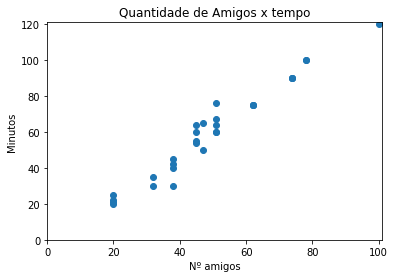

In [22]:
# Matriz representando covariância positiva (+amgs +minutos)
amg_minuts1 = [55, 60, 75, 40, 67, 100, 60, 90, 100, 60,
          75, 54, 120, 25, 64, 90, 45, 75, 42, 76,
          21, 90, 20, 30, 30, 65, 35, 22, 50, 64]


plt.scatter(num_amg, amg_minuts1) # dados
plt.axis([0, 101, 0, 121 ]) # valorex eixo x e y
plt.title('Quantidade de Amigos x tempo')
plt.xlabel('Nº amigos')
plt.ylabel('Minutos')
plt.show() # Exibir

In [23]:
covariance(num_amg, amg_minuts1)

502.17241379310366

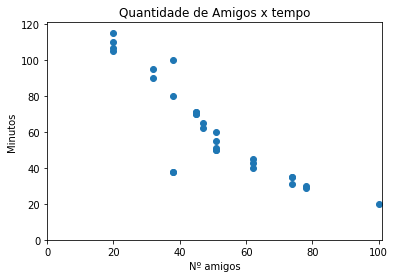

In [24]:
# Matriz representando covariância negativa (+amgs -minutos)
amg_minuts2 = [70, 50, 45, 100, 55, 30, 51, 35, 29, 71,
          43, 70, 20, 105, 71, 35, 80, 40, 38, 50,
          115, 31, 107, 38, 90, 65, 95, 110, 62, 60]

plt.scatter(num_amg, amg_minuts2) # dados
plt.axis([0, 101, 0, 121 ]) # valorex eixo x e y
plt.title('Quantidade de Amigos x tempo')
plt.xlabel('Nº amigos')
plt.ylabel('Minutos')
plt.show() # Exibir

In [25]:
covariance(num_amg, amg_minuts2)

-473.8839080459771

In [26]:
def correlacao(xs: List[float], ys: List[float]) -> float:
    desvio_xs = desvio_padrao(xs)
    desvio_ys = desvio_padrao(ys)
    
    if desvio_xs > 0 and desvio_ys >0:
        return covariance(xs,ys) / desvio_xs / desvio_ys
    else:
        return 0

In [27]:
correlacao(num_amg, amg_minuts1)

0.9776738130439477

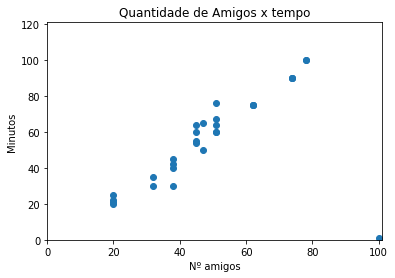

In [28]:
# Criando outlier para verificar diferença de correlaçao

amg_minuts1[12] = 1 # Atribuir 1 minuto para a pessoa q tem 100 amgs
plt.scatter(num_amg, amg_minuts1) # dados
plt.axis([0, 101, 0, 121 ]) # valorex eixo x e y
plt.title('Quantidade de Amigos x tempo')
plt.xlabel('Nº amigos')
plt.ylabel('Minutos')
plt.show() # Exibir

In [29]:
# Correlacao com outlier
correlacao(num_amg, amg_minuts1)

0.5840521107429874

In [30]:
# Correlação negativa usando a segunda matriz de minutos
correlacao(num_amg, amg_minuts2)

-0.8772027786768297